# This notebook is for the Fair-Shapely experiment

In [ ]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [ ]:
from src.data.unified_dataloader import load_dataset

a, processed_german_credit = load_dataset('german_credit')
# _, processed_uci = load_dataset('uci')

In [ ]:
processed_german_credit.head(20)

In [ ]:
processed_german_credit.iloc[:, 0:4]

In [ ]:
processed_german_credit.iloc[:, 4:-1]   # 有target就变成[:, 4:-1]，没有target就变成[:, 4:]

### 3. Split label/unlabel data, split train/test data.

In [ ]:
'''UCI dataset'''
# df = processed_uci.copy()
# X = df.drop('income', axis=1)
# y = df['income']

'''German Credit dataset'''
df = processed_german_credit.copy()
X = df.drop('Risk', axis=1)
y = df['Risk']


In [ ]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='german_credit', fairshap_base='DR', matching_method='NN')

### 4. read saved_csv file and make plots. FairSHAP(DR), threshold=0.05

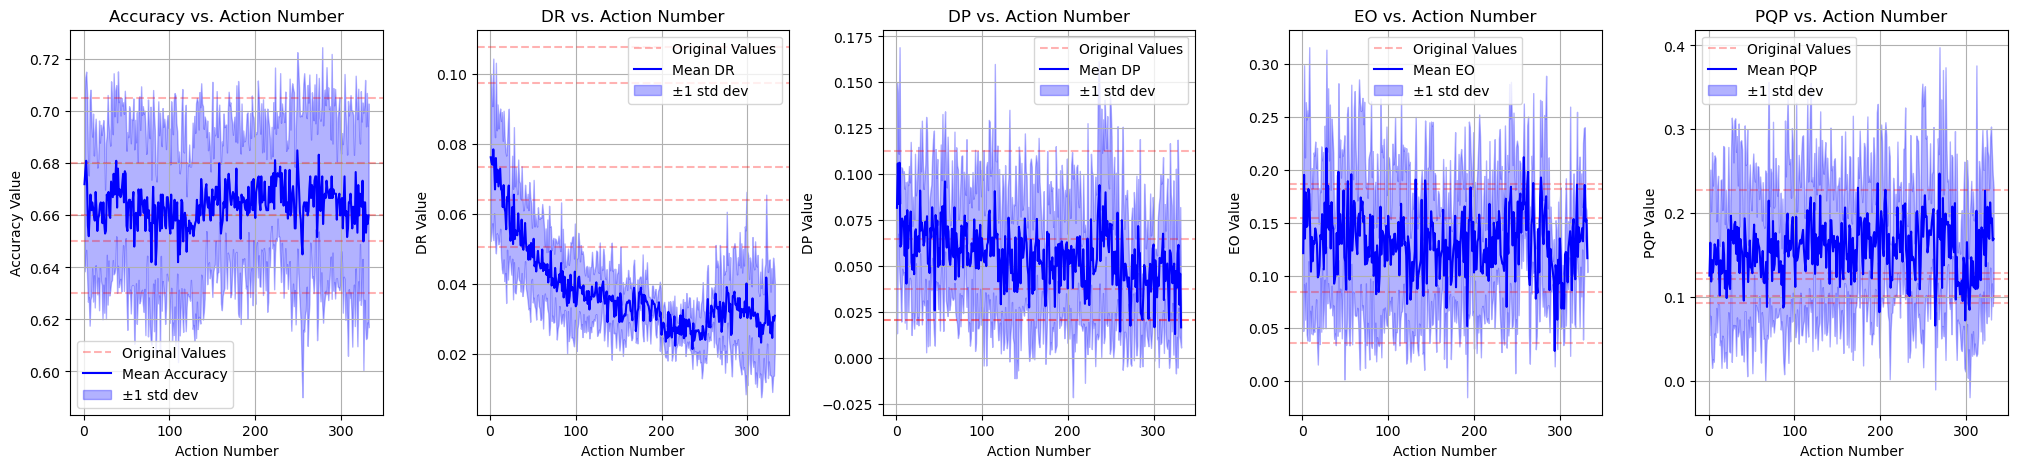

In [ ]:
import pandas as pd
import numpy as np
from src.visualization.visualization2 import plot_results

def extract_original_values(fold):
    original_accuracy = fold.loc[0, 'new_accuracy']
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    # original_recall = fold.loc[0, 'new_recall']
    # original_precision = fold.loc[0, 'new_precision']
    # original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_accuracy, original_DR, original_DP, original_EO, original_PQP

fold1 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_NN_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_NN_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_NN_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_NN_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_NN_5-fold_results.csv')
# fold1 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_OT_1-fold_results.csv')
# fold2 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_OT_2-fold_results.csv')
# fold3 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_OT_3-fold_results.csv')
# fold4 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_OT_4-fold_results.csv')
# fold5 = pd.read_csv('saved_results/german_credit/fairSHAP-DR_OT_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_accuracy = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_drs = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_dps = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_eos = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_pqps = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
# original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
# original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]

plot_results(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=None,
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3  

In [2]:
fold_last_rows = [
    fold1.iloc[-1], 
    fold2.iloc[-1], 
    fold3.iloc[-1], 
    fold4.iloc[-1], 
    fold5.iloc[-1]
]

# Convert to DataFrame for calculating mean and std
df_last_rows = pd.DataFrame(fold_last_rows)

# Calculate mean and std for each column
mean_values = df_last_rows.mean()
std_values = df_last_rows.std()

# Combine into a new DataFrame showing "mean ± std" format
result_df = pd.DataFrame({
    "Mean": mean_values,
    "Std": std_values,
    "Mean ± Std": mean_values.round(4).astype(str) + " ± " + std_values.round(4).astype(str)
})
result_df

,Mean,Std,Mean ± Std
action_number,323.200000,89.357149,323.2 ± 89.3571
new_accuracy,0.663000,0.027523,0.663 ± 0.0275
new_DR,0.024269,0.011193,0.0243 ± 0.0112
new_DP,0.030097,0.034701,0.0301 ± 0.0347
new_EO,0.112551,0.078288,0.1126 ± 0.0783
new_PQP,0.185179,0.107365,0.1852 ± 0.1074


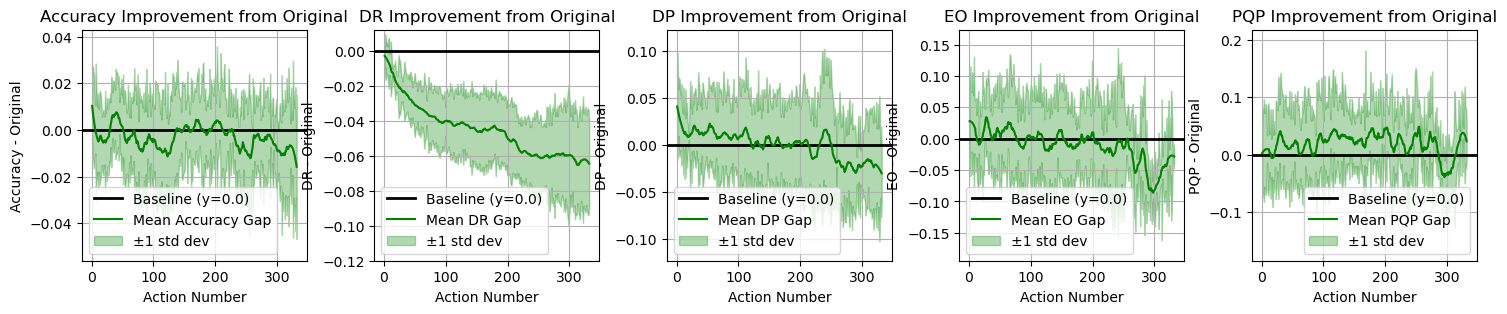

In [3]:
from src.visualization.visualization1 import plot_fairness_improvement

plot_fairness_improvement(
    folds=folds,
    original_accuracy=original_accuracy,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  
    min_action=1,
    baseline=0.0,
    figsize=(18,3),
    fill_alpha=0.3,
    fill_color='g',
    smooth_window=20,
    smooth_polyorder=2,
)